<a href="https://colab.research.google.com/github/kladrillono/MLA_KEL/blob/main/MLA4_KEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 4**


Kendall Ladrillono

# **Problem 1**

**Standard Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Imports for specific models

In [ ]:
from sklearn import tree
from sklearn.tree import export_text

Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn import set_config
set_config(display='diagram')

Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

SVC Classification - Acquire Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

Splitting Data into Train/Test

In [ ]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df[['forgery']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32)

Building the Pipeline

In [ ]:
num_variables = ['variance', 'skewness', 'curtosis', 'entropy']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                 ('num', MinMaxScaler(), num_variables),]
                                  )

In [ ]:
pipeline = Pipeline([
                    ('transform', col_transform),
                    ('decision_tree', tree.DecisionTreeClassifier(max_depth=5))
])

Executing the Model

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

Evaluating the Model

In [ ]:
y_pred = pipeline.predict(X_test)

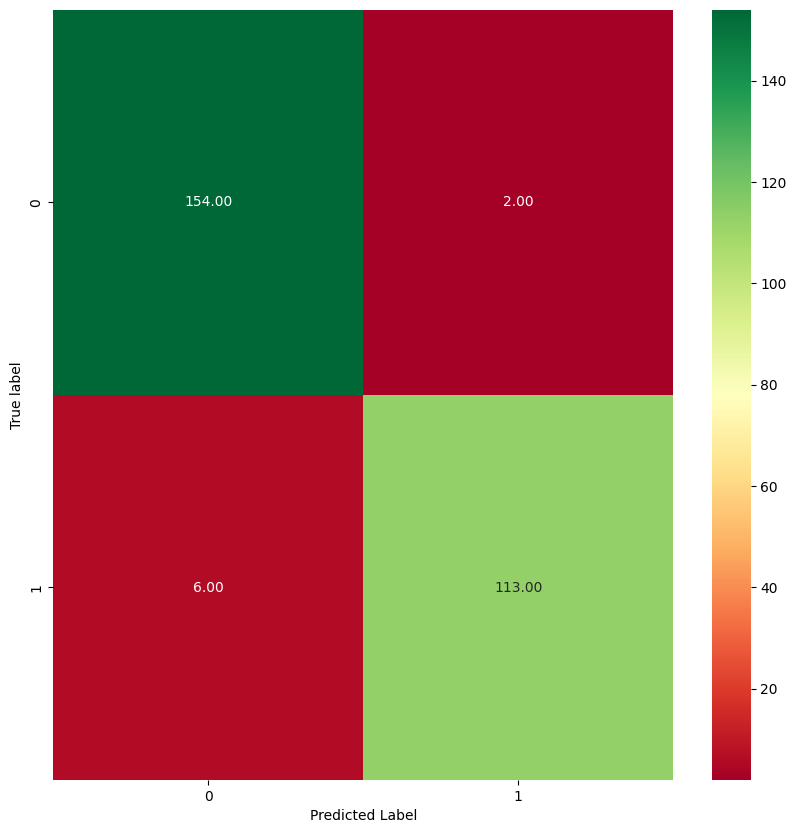

In [ ]:
plot_cm(y_test, y_pred)

In [ ]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision:  0.9826086956521739
Recall: 0.9495798319327731
F1 Score: 0.9658119658119659


The precision score is 0.98. This model correctly predicted the number of forgeries out of predicted forgeries very well. The recall score is 0.94. It is a high score that shows that the model correctly predicted the number of forgeries out of actual forgeries at 94%. The F1 score is 0.96. This score is the balance between our precision score and our recall score.

**Conclusion**

This model is suitable for predicting forgeries. The precision, recall and F1 scores are high. This model did well in predicting forgeries.

# **Problem 2**

Acquire Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [ ]:
df.rename(columns = {'Usage_kWh':'usage_kwh', 'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh', 'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh', 'Lagging_Current_Power_Factor':'lag_current_pwr', 'Leading_Current_Power_Factor':'lead_current_pwr', 'NSM':'nsm', 'WeekStatus':'week_status', 'Day_of_week':'day_of_week', 'Load_Type':'load_type'}, inplace = True)

Splitting Data into Train/Test

In [ ]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']].copy()

In [ ]:
y = df[['usage_kwh']].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

Building the Pipeline

In [ ]:
cat_variables = ['week_status', 'day_of_week', 'load_type']
num_variables = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']

In [ ]:
col_transform = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(), cat_variables),
        ('num', MinMaxScaler(), num_variables),]
      )

In [ ]:
pipeline = Pipeline([
                    ('transform', col_transform),
                    ('decision_tree', tree.DecisionTreeRegressor(max_depth=5))
])

Executing the Model

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

Evaluating the Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([63.02765086, 29.13360449,  4.75455898, ..., 63.02765086,
       46.71118561,  3.45842299])

In [ ]:
y_pred_train = pipeline.predict(X_train)

In [ ]:
y_pred_train

array([63.02765086, 63.02765086, 46.71118561, ...,  3.45842299,
        3.45842299,  3.45842299])

In [ ]:
print(mean_squared_error(y_train, y_pred_train)**(0.5))
print(mean_squared_error(y_test, y_pred)**(0.5))

3.5249255897811294
3.6060394083742837


These two root mean square error scores are close. This shows that the training set and the testing set are consistent between each other.

**Conclusion**

This model is suitable for predicting kwh usage. The root mean square error values are low and very close to each other which shows consistency with the data sets.